<div align = "center"><img src = "https://upload.wikimedia.org/wikipedia/en/thumb/3/3b/Stony_Brook_U_logo_vertical.svg/1024px-Stony_Brook_U_logo_vertical.svg.png" width ="300"></div>

# <div align="center"> **AMS 512 Notebook Project: Mathematica to Python** </div>

## <div align="center"> **Extreme Events** </div>

### <div align = "center"> **Authors:** *Ainasse, El Mehdi and Lize, Matheus Loss* </div>

In [ ]:
import pandas as pd
import numpy as np
import math
import os
import scipy.stats as stats
import sys
import random
import matplotlib.pyplot as plt
import seaborn as sns

#**Take a look on the Real Data**

In [ ]:
# For time stamps
from datetime import datetime
from pandas_datareader import data, wb

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(1927,12,29)

# We are going to consider S&P 500 index for this analysis
#snpData = data.DataReader(['sp500'],'fred',start,end)

# We are going to consider S&P 500 index for this analysis
snpData = data.DataReader('^GSPC','yahoo',start,end)


snpData.describe()

,High,Low,Open,Close,Volume,Adj Close
count,23290.000000,23290.000000,23290.000000,23290.000000,2.329000e+04,23290.000000
mean,485.548271,479.687303,482.713783,482.810971,7.641084e+08,482.810971
std,722.278236,714.222580,718.442224,718.535802,1.479783e+09,718.535802
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00,4.400000
25%,23.820000,23.820000,23.820000,23.820000,1.272500e+06,23.820000
50%,100.199997,98.620003,99.424999,99.445000,1.723000e+07,99.445000
75%,835.467484,814.412521,825.462509,827.079987,5.263100e+08,827.079987
max,3588.110107,3535.229980,3564.739990,3580.840088,1.145623e+10,3580.840088


Transforms the Daily data into Monthly Data: 

In [ ]:
snpDataMonth=snpData.groupby(pd.Grouper(freq='M')).mean()

<Figure size 2880x2880 with 0 Axes>

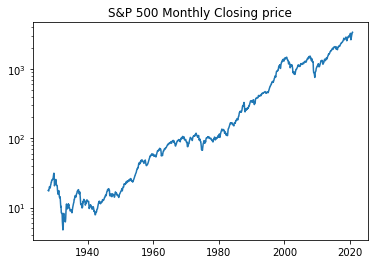

<Figure size 2880x2880 with 0 Axes>

In [ ]:
plt.plot(snpDataMonth['Adj Close'])
plt.title('S&P 500 Monthly Closing price')
plt.yscale("log")
plt.figure(figsize=(40,40))  # not working 

Log Return : 

In [ ]:
snpDataMonth['logReturn'] = np.log(snpDataMonth['Adj Close']) - np.log(snpDataMonth['Adj Close'].shift(1)) 

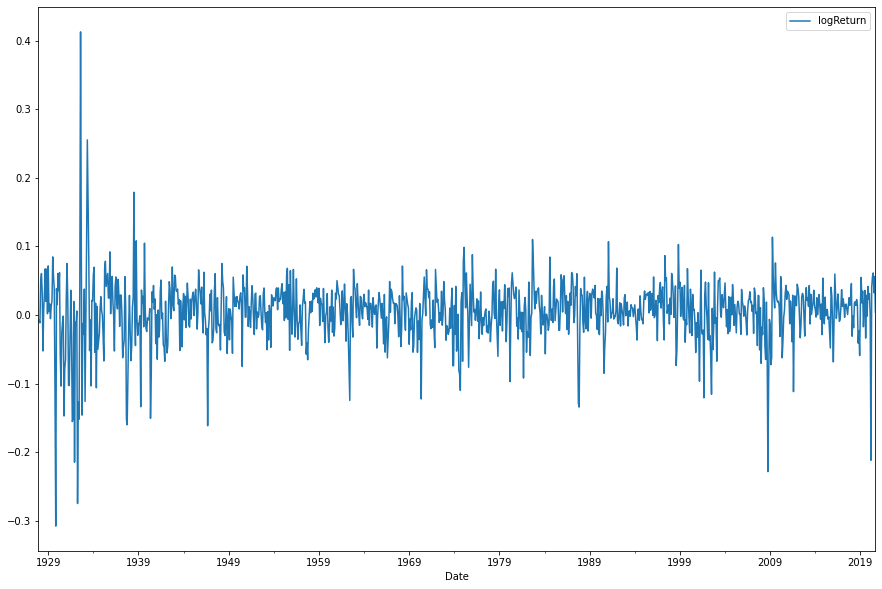

In [ ]:
snpDataMonth['logReturn'].plot(legend=True,figsize=(15,10) )

In [ ]:
snpLogReturn =snpDataMonth['logReturn'][1:]

# **Characterizing the Return Distribution** 

In [ ]:
nbins = 80

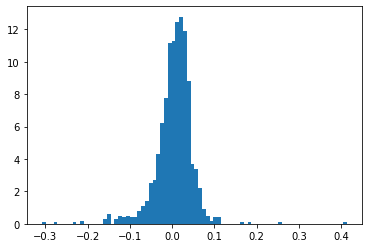

In [ ]:
_,bins,_ = plt.hist(snpLogReturn,density=True,bins=nbins)

In [ ]:
np.mean(snpLogReturn),np.std(snpLogReturn),stats.skew(snpLogReturn),stats.kurtosis(snpLogReturn)

(0.004727697081938116,
 0.04507521719342657,
 -0.544710877559385,
 12.237119800458718)

The kurtosis for a normal distribution is 0. 

In [ ]:
stats.kurtosis([np.random.normal() for i in range(1000)])

-0.04676983735736995

Fitting a Normal distribution $N (\mu,\sigma):$

In [ ]:
mu,sigma = stats.norm.fit(snpLogReturn)

In [ ]:
best_fit_line_norm = stats.norm.pdf(bins, mu, sigma)

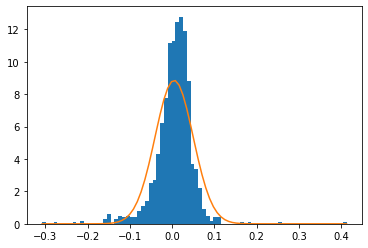

In [ ]:
_,bins,_ = plt.hist(snpLogReturn,bins=nbins,density=True)
plt.plot(bins,best_fit_line_norm)

Fitting a Student t distribution $t$

In [ ]:
stats.t.fit(snpLogReturn)

(2.9923578670069677, 0.009077874607204994, 0.026934858840570508)

In [ ]:
#stats.nct.fit(snpLogReturn)

Quantile Plots

((array([-3.22832832, -2.96545362, -2.8189085 , ...,  2.8189085 ,
          2.96545362,  3.22832832]),
  array([-0.30748842, -0.27456789, -0.22810378, ...,  0.17902412,
          0.25533158,  0.4127208 ])),
 (0.042019735599252865, 0.00473327956951573, 0.9298489921726014))

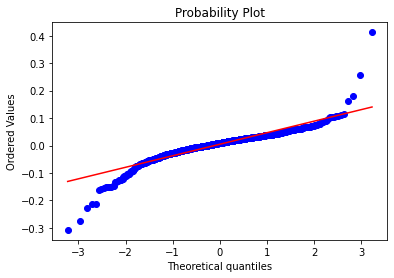

In [ ]:
stats.probplot(snpLogReturn,dist='norm',plot=plt)

((array([-0.31557262, -0.23067779, -0.19493004, ...,  0.2131097 ,
          0.24885745,  0.33375229]),
  array([-0.30748842, -0.27456789, -0.22810378, ...,  0.17902412,
          0.25533158,  0.4127208 ])),
 (1.0164531121117049, -0.0045061068667396975, 0.9825705162307911))

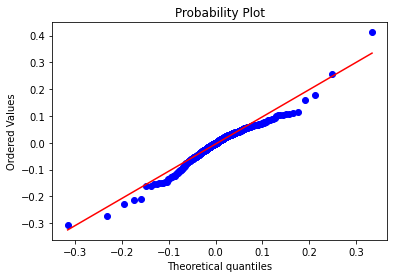

In [ ]:
stats.probplot(snpLogReturn,dist=stats.t(2.9914276198815717, 0.009089830436999109, 0.02693090874311875) ,plot=plt)

Take a look on more sophisticated plots [here](https://matplotlib.org/mpl-probscale/tutorial/closer_look_at_viz.html) .

#Hypothesis Tests

#Value at Risk & Expected Shortfall